<a href="https://colab.research.google.com/github/obaidur2020/CCMS/blob/master/Copy_of_ECG_Monitoring_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [19]:
#reading dataset
url='https://raw.githubusercontent.com/obaidur2020/Data-Science/master/IoT%20Device%20Data.csv'
df = pd.read_csv(url)
df.head()


,Id,Patient_Id,TestDate,Cycle,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
0,1008,103,47,24-06-2022,1,55,40,101,35,50,0.15,0.05,0.67,0.3,0.37
1,1008,103,47,24-06-2022,1,60,20,120,36,51,0.16,0.06,0.68,0.3,0.37
2,1008,103,47,24-06-2022,1,60,40,100,37,52,0.17,0.07,0.69,0.3,0.37
3,1008,103,47,24-06-2022,1,55,30,110,38,53,0.18,0.08,0.70,0.3,0.37
4,1008,103,47,24-06-2022,1,55,40,90,39,54,0.19,0.09,0.71,0.3,0.37


In [20]:
df.shape 

(254, 15)

In [21]:
df.describe()

,Id,Patient_Id,TestDate,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
count,254.0,254.0,254.0,254.0,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,2.540000e+02
mean,1008.0,103.0,47.0,1.0,56.248031,34.503937,102.082677,37.704724,53.307087,0.156024,0.062795,0.749370,3.000000e-01,3.700000e-01
std,0.0,0.0,0.0,0.0,3.826976,6.819380,10.427098,1.907810,2.370810,0.025867,0.044938,0.165555,5.562075e-17,5.562075e-17
min,1008.0,103.0,47.0,1.0,45.000000,20.000000,85.000000,35.000000,50.000000,0.150000,0.050000,0.670000,3.000000e-01,3.700000e-01
25%,1008.0,103.0,47.0,1.0,55.000000,30.000000,95.000000,36.000000,51.000000,0.150000,0.050000,0.670000,3.000000e-01,3.700000e-01
50%,1008.0,103.0,47.0,1.0,55.000000,35.000000,101.000000,38.000000,53.000000,0.150000,0.050000,0.670000,3.000000e-01,3.700000e-01
75%,1008.0,103.0,47.0,1.0,57.000000,40.000000,110.000000,39.000000,55.000000,0.150000,0.050000,0.670000,3.000000e-01,3.700000e-01
max,1008.0,103.0,47.0,1.0,68.000000,42.000000,120.000000,41.000000,57.000000,0.320000,0.300000,1.300000,3.000000e-01,3.700000e-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            254 non-null    int64  
 1   Patient_Id    254 non-null    int64  
 2   TestDate      254 non-null    int64  
 3   Cycle         254 non-null    object 
 4   DayCount      254 non-null    int64  
 5   P_Wave        254 non-null    int64  
 6   Q_Wave        254 non-null    int64  
 7   R_Wave        254 non-null    int64  
 8   S_Wave        254 non-null    int64  
 9   T_Wave        254 non-null    int64  
 10  PR_Interval   254 non-null    float64
 11  QRS_Complex   254 non-null    float64
 12  RR_Interval   254 non-null    float64
 13  QT_Interval   254 non-null    float64
 14  QTc_Interval  254 non-null    float64
dtypes: float64(5), int64(9), object(1)
memory usage: 29.9+ KB


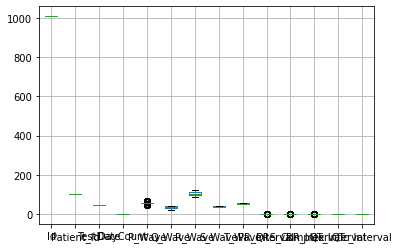

In [23]:
df.boxplot( ) 

In [25]:
df.cov()

,Id,Patient_Id,TestDate,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
Id,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Patient_Id,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TestDate,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DayCount,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
P_Wave,0.0,0.0,0.0,0.0,1.464575e+01,-5.839843e-01,-3.723663e-01,2.237248e-01,-5.349662e-01,-3.950546e-03,-2.514239e-03,-1.498148e-02,-2.494422e-32,2.494422e-32
Q_Wave,0.0,0.0,0.0,0.0,-5.839843e-01,4.650394e+01,-4.290841e+00,-5.219259e-02,6.597989e-02,7.074165e-04,-4.181009e-03,1.069683e-03,4.988844e-32,-4.988844e-32
R_Wave,0.0,0.0,0.0,0.0,-3.723663e-01,-4.290841e+00,1.087244e+02,-4.814198e-01,-6.658056e-01,8.669976e-03,7.791696e-03,-2.227973e-02,2.556782e-31,-2.556782e-31
S_Wave,0.0,0.0,0.0,0.0,2.237248e-01,-5.219259e-02,-4.814198e-01,3.639740e+00,1.305593e-01,-1.115745e-04,3.595437e-03,-4.732190e-03,-1.777276e-31,1.777276e-31
T_Wave,0.0,0.0,0.0,0.0,-5.349662e-01,6.597989e-02,-6.658056e-01,1.305593e-01,5.620740e+00,5.935078e-04,1.667860e-03,2.865270e-02,-6.859660e-32,6.859660e-32
PR_Interval,0.0,0.0,0.0,0.0,-3.950546e-03,7.074165e-04,8.669976e-03,-1.115745e-04,5.935078e-04,6.691062e-04,6.281551e-04,2.255485e-04,2.180183e-33,-2.180183e-33


In [26]:
df.corr()

,Id,Patient_Id,TestDate,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TestDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_Wave,NaN,NaN,NaN,NaN,1.000000,-0.022377,-0.009331,0.030642,-0.058962,-0.039907,-0.014620,-0.023646,NaN,NaN
Q_Wave,NaN,NaN,NaN,NaN,-0.022377,1.000000,-0.060344,-0.004012,0.004081,0.004010,-0.013643,0.000947,NaN,NaN
R_Wave,NaN,NaN,NaN,NaN,-0.009331,-0.060344,1.000000,-0.024201,-0.026933,0.032145,0.016629,-0.012906,NaN,NaN
S_Wave,NaN,NaN,NaN,NaN,0.030642,-0.004012,-0.024201,1.000000,0.028865,-0.002261,0.041937,-0.014983,NaN,NaN
T_Wave,NaN,NaN,NaN,NaN,-0.058962,0.004081,-0.026933,0.028865,1.000000,0.009678,0.015655,0.073001,NaN,NaN
PR_Interval,NaN,NaN,NaN,NaN,-0.039907,0.004010,0.032145,-0.002261,0.009678,1.000000,0.540387,0.052669,NaN,NaN


In [28]:
df['Age'].unique() 

KeyError: ignored

In [29]:
df.R.value_counts().sort_index()

AttributeError: ignored

In [32]:
conditions = [
(df['R'] >= 47),
(df['R'] <= 21)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating)
fpie=df.rating.value_counts()
df.rating.value_counts()


KeyError: ignored

In [33]:
pi_plot=df.R.value_counts().sort_index()
plt.pie(pi_plot, labels=['14', '1', '1', '1', '2', '1'], colors=['yellow', 'red', 'green', 'blue', 'orange','grey'],
autopct='%.f%%')
plt.show()

AttributeError: ignored

In [34]:
sns.countplot(x='R',data=df)
plt.title('Sympthomatic Quality Count')
plt.show()

ValueError: ignored

In [35]:
#Dataset median
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id              1008.00
Patient_Id       103.00
TestDate          47.00
DayCount           1.00
P_Wave            55.00
Q_Wave            35.00
R_Wave           101.00
S_Wave            38.00
T_Wave            53.00
PR_Interval        0.15
QRS_Complex        0.05
RR_Interval        0.67
QT_Interval        0.30
QTc_Interval       0.37
dtype: float64

In [36]:
#Checking kurtosis
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id               0.000000
Patient_Id       0.000000
TestDate         0.000000
DayCount         0.000000
P_Wave           2.410258
Q_Wave          -0.544185
R_Wave          -0.757713
S_Wave          -1.189796
T_Wave          -1.292127
PR_Interval     21.802849
QRS_Complex     13.491636
RR_Interval      2.710180
QT_Interval      0.000000
QTc_Interval     0.000000
dtype: float64

In [ ]:
#Checking skewness
df.skew()

In [41]:
#Checking correlation
df.corr()

,Id,Patient_Id,TestDate,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TestDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_Wave,NaN,NaN,NaN,NaN,1.000000,-0.022377,-0.009331,0.030642,-0.058962,-0.039907,-0.014620,-0.023646,NaN,NaN
Q_Wave,NaN,NaN,NaN,NaN,-0.022377,1.000000,-0.060344,-0.004012,0.004081,0.004010,-0.013643,0.000947,NaN,NaN
R_Wave,NaN,NaN,NaN,NaN,-0.009331,-0.060344,1.000000,-0.024201,-0.026933,0.032145,0.016629,-0.012906,NaN,NaN
S_Wave,NaN,NaN,NaN,NaN,0.030642,-0.004012,-0.024201,1.000000,0.028865,-0.002261,0.041937,-0.014983,NaN,NaN
T_Wave,NaN,NaN,NaN,NaN,-0.058962,0.004081,-0.026933,0.028865,1.000000,0.009678,0.015655,0.073001,NaN,NaN
PR_Interval,NaN,NaN,NaN,NaN,-0.039907,0.004010,0.032145,-0.002261,0.009678,1.000000,0.540387,0.052669,NaN,NaN


In [40]:
#Checking covariance
df.cov()

,Id,Patient_Id,TestDate,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
Id,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Patient_Id,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TestDate,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DayCount,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
P_Wave,0.0,0.0,0.0,0.0,1.464575e+01,-5.839843e-01,-3.723663e-01,2.237248e-01,-5.349662e-01,-3.950546e-03,-2.514239e-03,-1.498148e-02,-2.494422e-32,2.494422e-32
Q_Wave,0.0,0.0,0.0,0.0,-5.839843e-01,4.650394e+01,-4.290841e+00,-5.219259e-02,6.597989e-02,7.074165e-04,-4.181009e-03,1.069683e-03,4.988844e-32,-4.988844e-32
R_Wave,0.0,0.0,0.0,0.0,-3.723663e-01,-4.290841e+00,1.087244e+02,-4.814198e-01,-6.658056e-01,8.669976e-03,7.791696e-03,-2.227973e-02,2.556782e-31,-2.556782e-31
S_Wave,0.0,0.0,0.0,0.0,2.237248e-01,-5.219259e-02,-4.814198e-01,3.639740e+00,1.305593e-01,-1.115745e-04,3.595437e-03,-4.732190e-03,-1.777276e-31,1.777276e-31
T_Wave,0.0,0.0,0.0,0.0,-5.349662e-01,6.597989e-02,-6.658056e-01,1.305593e-01,5.620740e+00,5.935078e-04,1.667860e-03,2.865270e-02,-6.859660e-32,6.859660e-32
PR_Interval,0.0,0.0,0.0,0.0,-3.950546e-03,7.074165e-04,8.669976e-03,-1.115745e-04,5.935078e-04,6.691062e-04,6.281551e-04,2.255485e-04,2.180183e-33,-2.180183e-33


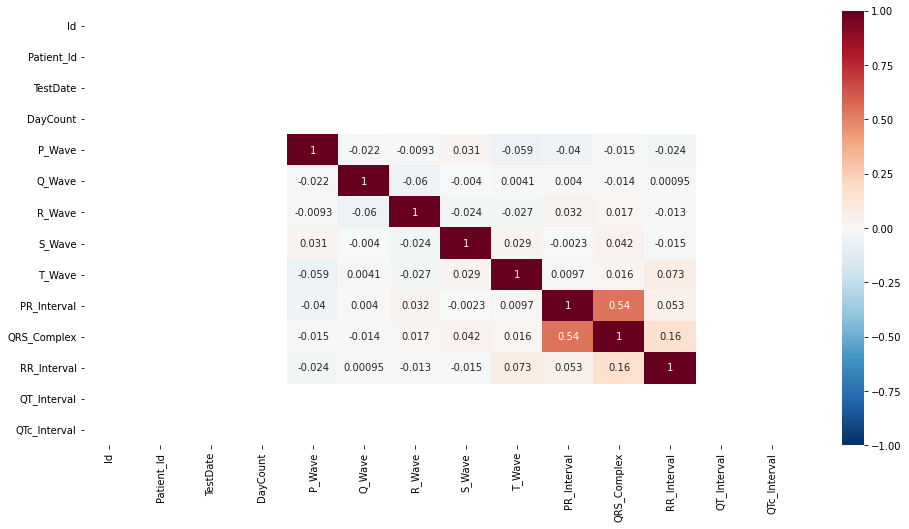

In [42]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [43]:
correlation['R'].sort_values(ascending=False)

KeyError: ignored

In [44]:
bxplt = sns.boxplot(x="rating", y='R', data = df)
bxplt.set(xlabel='Q', ylabel='R Percent', title='R percent in different heart quality types')

ValueError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f505768b588>,
      dtype=object)

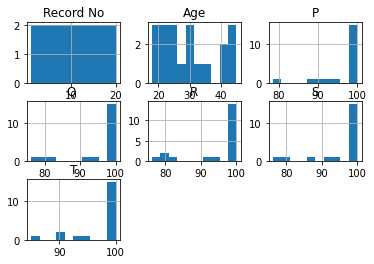

In [ ]:
df.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


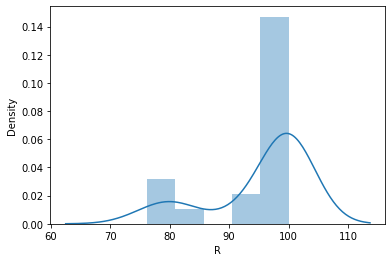

In [ ]:
#Distribution Plot
sns.distplot(df['R'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


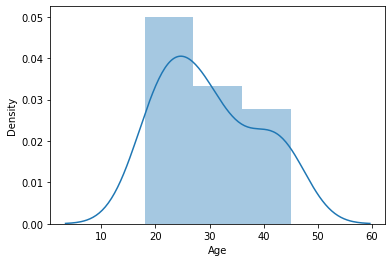

In [ ]:
#Distribution Plot
sns.distplot(df['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


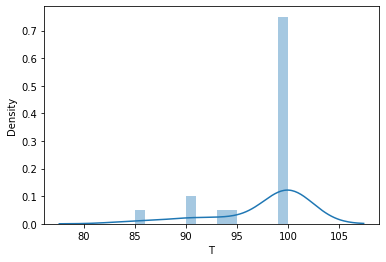

In [ ]:
#Distribution Plot
sns.distplot(df['T'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


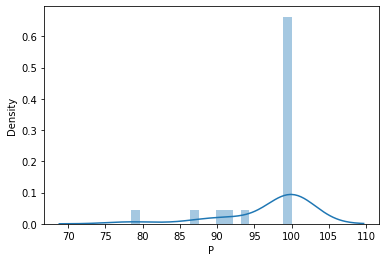

In [ ]:
#Distribution Plot
sns.distplot(df['P'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


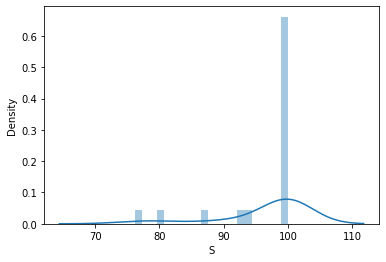

In [ ]:
#Distribution Plot
sns.distplot(df['S'])

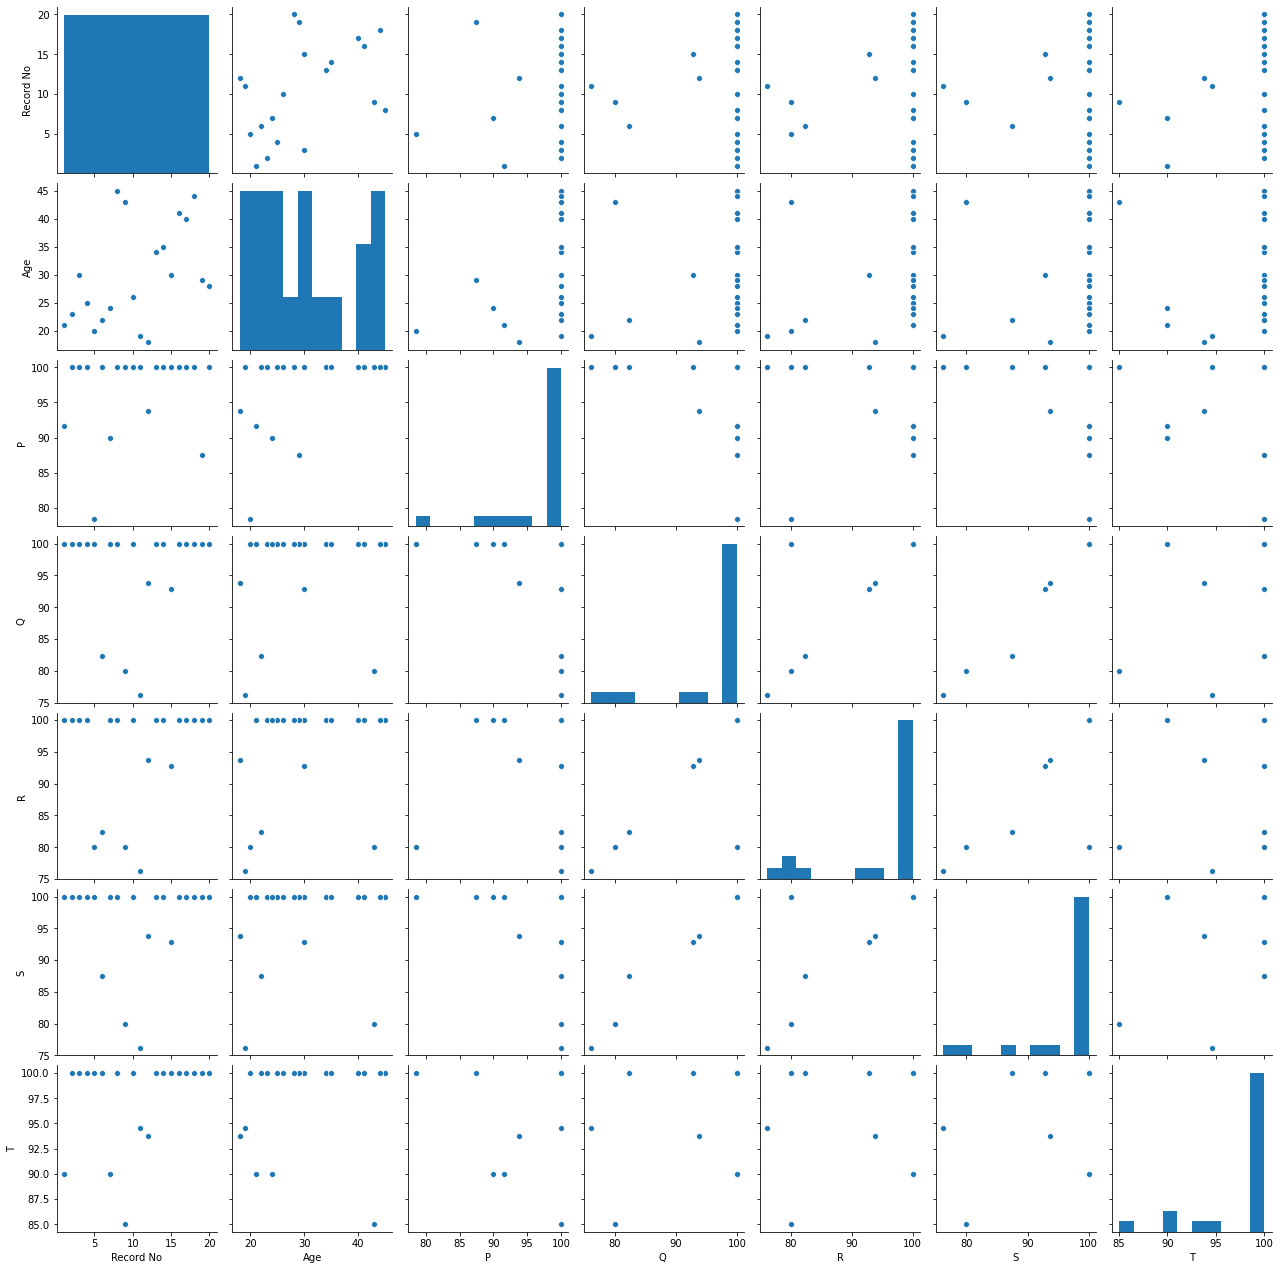

In [ ]:
#Drawing Pairplot
sns.pairplot(df);

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [46]:
url='https://raw.githubusercontent.com/obaidur2020/Data-Science/master/IoT%20Device%20Data.csv'
df = pd.read_csv(url)
df.head()

,Id,Patient_Id,TestDate,Cycle,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
0,1008,103,47,24-06-2022,1,55,40,101,35,50,0.15,0.05,0.67,0.3,0.37
1,1008,103,47,24-06-2022,1,60,20,120,36,51,0.16,0.06,0.68,0.3,0.37
2,1008,103,47,24-06-2022,1,60,40,100,37,52,0.17,0.07,0.69,0.3,0.37
3,1008,103,47,24-06-2022,1,55,30,110,38,53,0.18,0.08,0.70,0.3,0.37
4,1008,103,47,24-06-2022,1,55,40,90,39,54,0.19,0.09,0.71,0.3,0.37


In [51]:
x = df[['Patient_Id','S_Wave','T_Wave']]
y = df['R_Wave']
df

,Id,Patient_Id,TestDate,Cycle,DayCount,P_Wave,Q_Wave,R_Wave,S_Wave,T_Wave,PR_Interval,QRS_Complex,RR_Interval,QT_Interval,QTc_Interval
0,1008,103,47,24-06-2022,1,55,40,101,35,50,0.15,0.05,0.67,0.3,0.37
1,1008,103,47,24-06-2022,1,60,20,120,36,51,0.16,0.06,0.68,0.3,0.37
2,1008,103,47,24-06-2022,1,60,40,100,37,52,0.17,0.07,0.69,0.3,0.37
3,1008,103,47,24-06-2022,1,55,30,110,38,53,0.18,0.08,0.70,0.3,0.37
4,1008,103,47,24-06-2022,1,55,40,90,39,54,0.19,0.09,0.71,0.3,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1008,103,47,24-06-2022,1,55,40,100,39,50,0.15,0.05,0.67,0.3,0.37
250,1008,103,47,24-06-2022,1,55,35,110,40,50,0.15,0.05,0.67,0.3,0.37
251,1008,103,47,24-06-2022,1,55,42,90,35,50,0.15,0.05,0.67,0.3,0.37
252,1008,103,47,24-06-2022,1,55,40,85,36,50,0.15,0.05,0.67,0.3,0.37


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df

In [68]:
predictions = linreg.predict(x_test)
pdf = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pdf

NameError: ignored

In [65]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

NameError: ignored

In [45]:
print("Train set Accuracy: ", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy: ", r2_score(y_test, predictions))

NameError: ignored

In [55]:
sns.regplot(x=y_test, y=predictions)

NameError: ignored

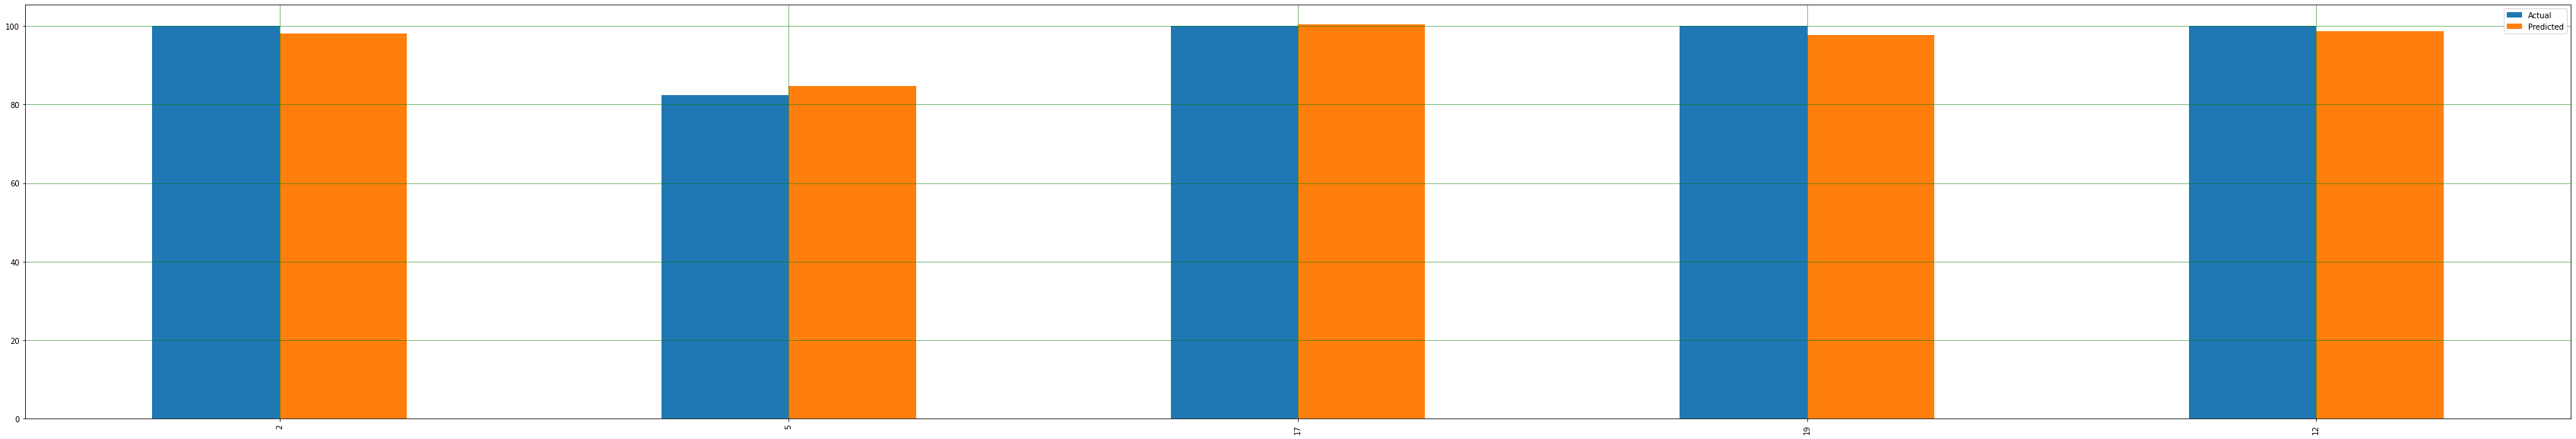

In [ ]:

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
new_observation = [[4,4, 6]]
linreg.predict(new_observation)

array([17.77974531])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

polymodel = LinearRegression()
polymodel.fit(x_, y)
polymodel.coef_

array([ 2.86498690e-16, -2.13839780e-09,  8.89799523e-10, -1.52050071e-11,
       -8.88040321e-08, -1.30203071e-07, -1.35994810e-07,  9.82354139e-08,
        5.75434372e-08, -1.95074749e-09,  4.40530644e-06, -5.04856628e-06,
       -5.53829618e-06, -6.23342236e-06, -5.66470440e-06, -6.52479681e-06,
        6.11121909e-06,  4.75482896e-06,  2.80534964e-06, -1.51939317e-07,
       -8.12984913e-04,  5.83179612e-04,  5.45235104e-04, -1.55699222e-04,
       -1.72327633e-04, -2.49832345e-04, -4.47208066e-05,  8.65447036e-05,
        9.74786099e-05, -9.78576480e-06,  6.71475307e-06, -9.55512996e-06,
       -7.83218599e-06,  3.38313711e-06, -4.07682285e-06])